<a href="https://colab.research.google.com/github/bazrafshanmh/hands-ml/blob/master/end2endMLproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import matplotlib.pyplot as plt
from functools import *
# !pip install ipympl seaborn scikit_learn
%matplotlib widget
plt.ion()

In [24]:
# Import libraries
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
def loadData():
  tarball_path = Path("datasets/housing.tgz")
  if not tarball_path.is_file():
    tarball_path = Path("datasets/housing.tgz")
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url="https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path="datasets")
  return pd.read_csv(Path("datasets/housing/housing.csv"))


In [25]:
housing = loadData()

## *Train_Test_split*

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split

In [27]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0, 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

In [28]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

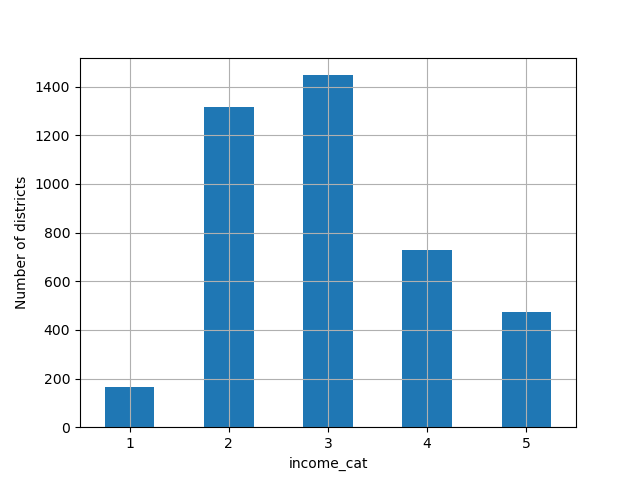

In [29]:
fig = plt.figure()
fig.clear()
plt.xlabel("Categorical Income")
plt.ylabel("Number of districts")
strat_test_set["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)

plt.show()


In [30]:
reduce(lambda a, b: a and b, [str("%.2f" % i)[:3]=="0.2" for i in strat_test_set["income_cat"].value_counts()/strat_train_set["income_cat"].value_counts()])

True

In [31]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

In [32]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

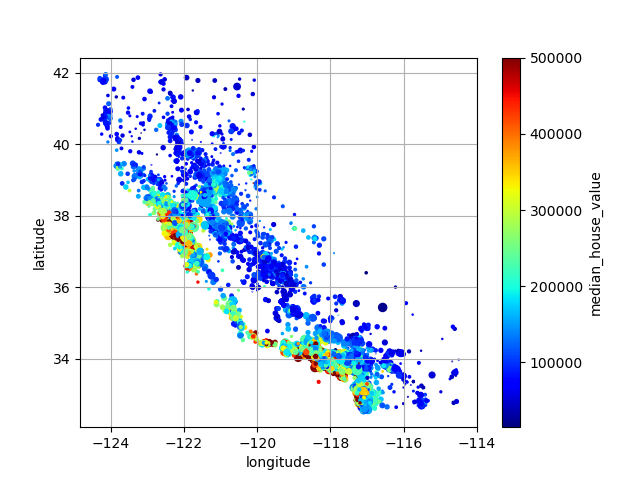

In [33]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, s=housing["population"]/200, c="median_house_value", cmap="jet", colorbar=True, legend=True, sharex=False)

In [34]:
corr_matrix = housing.loc[:, ~housing.columns.str.contains('ocean_proximity')].corr()

In [35]:
corr_matrix["median_house_value"]

longitude            -0.050859
latitude             -0.139584
housing_median_age    0.102175
total_rooms           0.137455
total_bedrooms        0.054635
population           -0.020153
households            0.071426
median_income         0.688380
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [36]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [37]:
# from seaborn import heatmap
# corr_matrix=housing.loc[:, ~housing.columns.str.contains('ocean_proximity')].corr()
# fig = plt.figure()
# fig.clear()
# heatmap(corr_matrix)

In [38]:
corr_matrix["median_house_value"]

longitude            -0.050859
latitude             -0.139584
housing_median_age    0.102175
total_rooms           0.137455
total_bedrooms        0.054635
population           -0.020153
households            0.071426
median_income         0.688380
median_house_value    1.000000
Name: median_house_value, dtype: float64

# Seperate X and Y

In [39]:
X_train, y_train = strat_train_set.drop("median_house_value", axis=1), strat_train_set["median_house_value"].copy()
X_test, y_test = strat_test_set.drop("median_house_value", axis=1), strat_test_set["median_house_value"].copy()

In [40]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
housing_num = housing.select_dtypes(include=[np.number])
imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(housing_num)
housing_num = pd.DataFrame(imputed, columns=housing_num.columns, index=housing_num.index)

Category Encoding

In [41]:
from sklearn.preprocessing import OneHotEncoder
housing_cat = housing[["ocean_proximity"]]
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)


In [42]:
# housing_cat_1hot.toarray().shape
df_output = pd.DataFrame(housing_cat_1hot.toarray(), columns=cat_encoder.get_feature_names_out(), index=housing_cat.index)

In [43]:
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,0.0,0.0,0.0,1.0,0.0
14973,1.0,0.0,0.0,0.0,0.0
3785,0.0,1.0,0.0,0.0,0.0
14689,0.0,1.0,0.0,0.0,0.0
20507,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
14207,1.0,0.0,0.0,0.0,0.0
13105,0.0,1.0,0.0,0.0,0.0
19301,0.0,0.0,0.0,0.0,1.0
19121,1.0,0.0,0.0,0.0,0.0


# Feature Scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = scaler.fit_transform(housing_num)
housing_num_min_max_scaled = pd.DataFrame(housing_num_min_max_scaled, columns=housing_num.columns, index=housing_num.index)


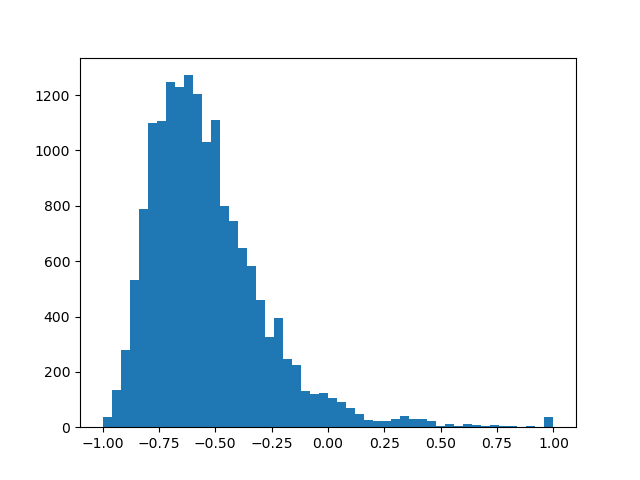

In [45]:
fig = plt.figure()
fig.clear()
plt.hist(housing_num_min_max_scaled["median_income"], bins=50)
plt.show()

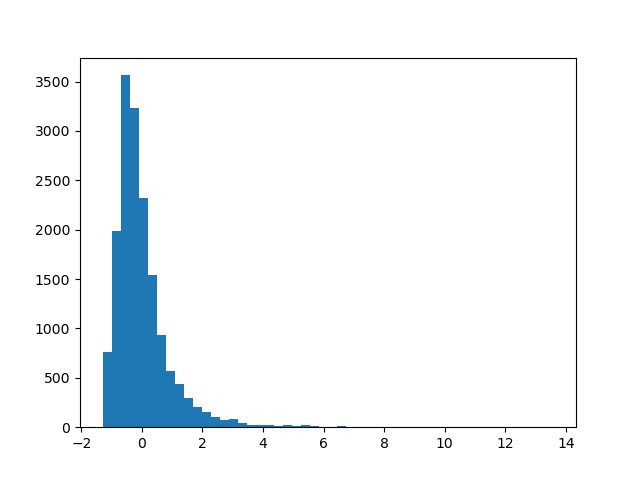

In [46]:
fig = plt.figure()
fig.clear()
from sklearn.preprocessing import StandardScaler
Sscaler = StandardScaler()
scaled = Sscaler.fit_transform(housing_num)
scaled = pd.DataFrame(scaled, housing_num.index, columns=housing_num.columns)
plt.hist(scaled["population"], bins=50)
plt.show()



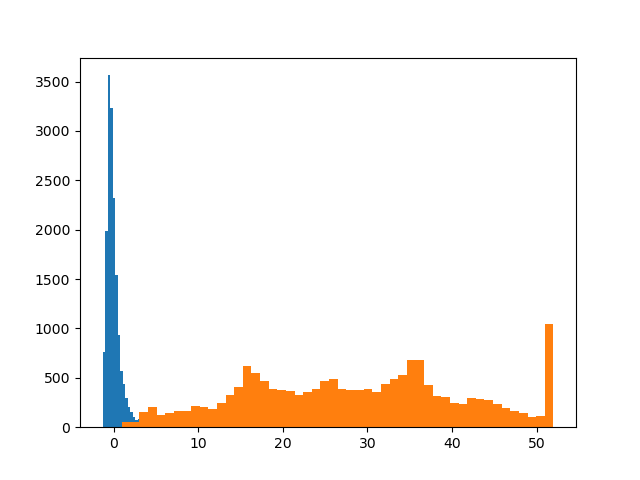

In [47]:
plt.hist(housing["housing_median_age"], bins=50)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


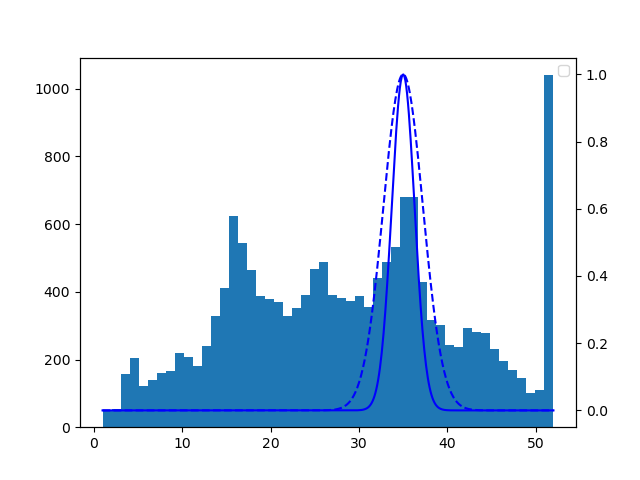

In [94]:
gamma1 = 0.1
gamma2 = 0.3
from sklearn.metrics.pairwise import rbf_kernel
ages=np.linspace(housing["housing_median_age"].min(), housing["housing_median_age"].max(), 500).reshape(-1, 1)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.plot(ages, rbf_kernel(ages, [[35]], gamma=gamma1), color="blue", linestyle="--")
ax2.plot(ages, rbf_kernel(ages, [[35]], gamma=gamma2), color="blue", linestyle="-")
ax2.legend()

ax1.hist(housing["housing_median_age"], bins=50)
plt.show()


In [89]:
for i in range(20):
    plt.close(i)